# Imports

In [11]:
pip install opencv-python

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.7/61.7 MB 25.4 MB/s eta 0:00:00m eta 0:00:010:00:01
Note: you may need to restart the kernel to use updated packages.


In [12]:
import numpy as np
from PIL import Image
import tensorflow as tf
from matplotlib import pyplot as plt
#from sklearn.model_selection import train_test_split
import os
import keras_tuner as kt
import cv2

# MODEL ONE

## END GOAL

IMAGE Vec -> 6 joint outputs 

for movement of arm to condiment section

## Structure of data

IMAGES -> 6 joint positions 

images labeled with the 6 different joint positions 

multiple different starting positions with different ways to get to the condiment section

Once object detection team done add the positions of the condiments and have the arm grab them 

# MODEL TWO

## END GOAL 

IMAGE vec -> 6 joint outputs

from condiment section to the person

## Structure od data

images labeled with 6 different joing positions

multiple different starting positions with different ways to get to the person from the condiment sections

from the object detection model we will take the persons position and use that to have the model move to the person


# trying to make a linear regression model for age analysis

In [2]:
# loading the dataset

X = []
y = []

image_folder_path = "../data/processed/UTKFace"

# Get a list of all the images in the folder
image_files = os.listdir(image_folder_path)

for x in range(len(image_files)):
    if x < 10000:
        if os.path.isfile(image_folder_path + "/" + image_files[x]):
            X.append(np.array(Image.open(image_folder_path + "/" +  image_files[x])))
            y.append(np.array([int(image_files[x].split('_')[0])]))
        else:
            print("file not found")
    else:
        pass
    
X = np.array(X)
y = np.array(y)

In [3]:
# used this to split the data 
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, train_size = 0.8)
X = None
y = None

In [ ]:
# def model_builder(hp):
#     model = tf.keras.models.Sequential()
#     model.add(tf.keras.layers.Normalization(input_shape=(200,200,3)))
    
#     hp_units_conv1 = hp.Int('units', min_value=32, max_value=128, step=16)
#     model.add(tf.keras.layers.Conv2D(hp_units_conv1, (3, 3), activation='relu'))
#     model.add(tf.keras.layers.MaxPooling2D(2,2))
    
#     hp_units_conv2 = hp.Int('units', min_value=64, max_value=128, step=16)
#     model.add(tf.keras.layers.Conv2D(hp_units_conv2, (3, 3), activation='relu'))
#     model.add(tf.keras.layers.MaxPooling2D(2,2))
    
#     hp_units_conv3 = hp.Int('units', min_value=128, max_value=256, step=16)
#     model.add(tf.keras.layers.Conv2D(hp_units_conv3, (3, 3), activation='relu'))
#     model.add(tf.keras.layers.MaxPooling2D(2,2))
#     model.add(tf.keras.layers.Flatten())
    
#     hp_units_dense1 = hp.Int('units', min_value=32, max_value=512, step=32)
#     model.add(tf.keras.layers.Dense(64, activation='relu'))
#     model.add(tf.keras.layers.Dense(1, activation='relu'))
#     hp_learning_rate = hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])
#     model.compile(loss=tf.keras.losses.MeanSquaredError(),
#                 optimizer=tf.keras.optimizers.Adam(hp_learning_rate), metrics=[tf.keras.metrics.MeanAbsoluteError()])
#     return model

In [ ]:
# stop_early = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)

# tuner = kt.Hyperband(model_builder,
#                      objective='mse',
#                      max_epochs=10,
#                      factor=3,
#                      directory='/',
#                      project_name='intro_to_kt')

# tuner.search(X_train, y_train, epochs=10, validation_split=0.2, callbacks=[stop_early])

# # Get the optimal hyperparameters
# best_hps=tuner.get_best_hyperparameters(num_trials=1)[0]

# print(f"""
# The hyperparameter search is complete. The optimal number of units in the first densely-connected
# layer is {best_hps.get('units')} and the optimal learning rate for the optimizer
# is {best_hps.get('learning_rate')}.
# """)

In [15]:
def create_model():
    model = tf.keras.models.Sequential()
    model.add(tf.keras.layers.Normalization(input_shape=(200, 200, 3)))
    model.add(tf.keras.layers.Conv2D(112, (3, 3), activation='relu'))
    model.add(tf.keras.layers.MaxPooling2D(2,2))
    model.add(tf.keras.layers.Conv2D(80, (3, 3), activation='relu'))
    model.add(tf.keras.layers.MaxPooling2D(2,2))
    model.add(tf.keras.layers.Conv2D(256, (3, 3), activation='relu'))
    model.add(tf.keras.layers.MaxPooling2D(2,2))
    model.add(tf.keras.layers.Flatten())
    model.add(tf.keras.layers.Dense(32, activation='relu'))
    model.add(tf.keras.layers.Dense(1, activation='relu'))
    model.compile(loss=tf.keras.losses.MeanSquaredError(),
                    optimizer=tf.keras.optimizers.Adam(0.0001), metrics=[tf.keras.metrics.MeanAbsoluteError()])
    return model

In [25]:
history = model.fit(X_train, y_train, epochs=10, 
                    validation_data=(X_test, y_test))

In [26]:
model = tf.keras.models.load_model('../models/my_model_v1')
model.evaluate(X_test, y_test)

63/63 [==============================] - 27s 424ms/step - loss: 90.5707 - mean_absolute_error: 7.0192


[90.57069396972656, 7.019184589385986]

In [31]:
predicts = model.predict(X_test)

63/63 [==============================] - 27s 427ms/step


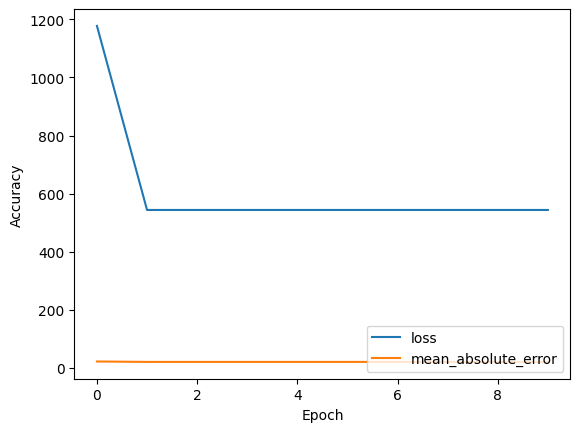

In [10]:
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['mean_absolute_error'], label='mean_absolute_error')
plt.xlabel('Epoch')
plt.ylabel('loss')
plt.legend(loc='lower right')
# test_loss, test_acc = model.evaluate(X_test,  y_test, verbose=2)

# END

# ROBOT CONNECTION CLASS

In [13]:
'''
Michael Dawson-Haggerty

abb.py: contains classes and support functions which interact with an ABB Robot running our software stack (RAPID code module SERVER)


For functions which require targets (XYZ positions with quaternion orientation),
targets can be passed as [[XYZ], [Quats]] OR [XYZ, Quats]

'''

import socket
import json 
import time
import inspect
from threading import Thread
from collections import deque
import logging

log = logging.getLogger(__name__)
log.addHandler(logging.NullHandler())
    
class Robot:
    def __init__(self, 
                 ip          = '192.168.125.1', 
                 port_motion = 5000,
                 port_logger = 5001):

        self.delay   = .08

        self.connect_motion((ip, port_motion))
        #log_thread = Thread(target = self.get_net, 
        #                    args   = ((ip, port_logger))).start()
        
        self.set_units('millimeters', 'degrees')
        self.set_tool()
        self.set_workobject()
        self.set_speed()
        self.set_zone()

    def connect_motion(self, remote):        
        log.info('Attempting to connect to robot motion server at %s', str(remote))
        self.sock = socket.socket(socket.AF_INET, socket.SOCK_STREAM)
        self.sock.settimeout(2.5)
        self.sock.connect(remote)
        self.sock.settimeout(None)
        log.info('Connected to robot motion server at %s', str(remote))

    def connect_logger(self, remote, maxlen=None):
        self.pose   = deque(maxlen=maxlen)
        self.joints = deque(maxlen=maxlen)
        
        s = socket.socket(socket.AF_INET, socket.SOCK_STREAM)
        s.connect(remote)
        s.setblocking(1)
        try:
            while True:
                data = map(float, s.recv(4096).split())
                if   int(data[1]) == 0: 
                    self.pose.append([data[2:5], data[5:]])
                #elif int(data[1]) == 1: self.joints.append([a[2:5], a[5:]])
        finally:
            s.shutdown(socket.SHUT_RDWR)

    def set_units(self, linear, angular):
        units_l = {'millimeters': 1.0,
                   'meters'     : 1000.0,
                   'inches'     : 25.4}
        units_a = {'degrees' : 1.0,
                   'radians' : 57.2957795}
        self.scale_linear = units_l[linear]
        self.scale_angle  = units_a[angular]

    def set_cartesian(self, pose):
        '''
        Executes a move immediately from the current pose,
        to 'pose', with units of millimeters.
        '''
        msg  = "01 " + self.format_pose(pose)   
        return self.send(msg)

    def set_joints(self, joints):
        '''
        Executes a move immediately, from current joint angles,
        to 'joints', in degrees. 
        '''
        if len(joints) != 6: return False
        msg = "02 "
        for joint in joints: msg += format(joint*self.scale_angle, "+08.2f") + " " 
        msg += "#" 
        return self.send(msg)

    def get_cartesian(self):
        '''
        Returns the current pose of the robot, in millimeters
        '''
        msg = "03 #"
        data = self.send(msg).split()
        r = [float(s) for s in data]
        return [r[2:5], r[5:9]]

    def get_joints(self):
        '''
        Returns the current angles of the robots joints, in degrees. 
        '''
        msg = "04 #"
        data = self.send(msg).split()
        return [float(s) / self.scale_angle for s in data[2:8]]

    def get_external_axis(self):
        '''
        If you have an external axis connected to your robot controller
        (such as a FlexLifter 600, google it), this returns the joint angles
        '''
        msg = "05 #"
        data = self.send(msg).split()
        return [float(s) for s in data[2:8]]
       
    def get_robotinfo(self):
        '''
        Returns a robot- unique string, with things such as the
        robot's model number. 
        Example output from and IRB 2400:
        ['24-53243', 'ROBOTWARE_5.12.1021.01', '2400/16 Type B']
        '''
        msg = "98 #"
        data = str(self.send(msg))[5:].split('*')
        log.debug('get_robotinfo result: %s', str(data))
        return data

    def set_tool(self, tool=[[0,0,0], [1,0,0,0]]):
        '''
        Sets the tool centerpoint (TCP) of the robot. 
        When you command a cartesian move, 
        it aligns the TCP frame with the requested frame.
        
        Offsets are from tool0, which is defined at the intersection of the
        tool flange center axis and the flange face.
        '''
        msg       = "06 " + self.format_pose(tool)    
        self.send(msg)
        self.tool = tool

    def load_json_tool(self, file_obj):
        if file_obj.__class__.__name__ == 'str':
            file_obj = open(filename, 'rb');
        tool = check_coordinates(json.load(file_obj))
        self.set_tool(tool)
        
    def get_tool(self): 
        log.debug('get_tool returning: %s', str(self.tool))
        return self.tool

    def set_workobject(self, work_obj=[[0,0,0],[1,0,0,0]]):
        '''
        The workobject is a local coordinate frame you can define on the robot,
        then subsequent cartesian moves will be in this coordinate frame. 
        '''
        msg = "07 " + self.format_pose(work_obj)   
        self.send(msg)

    def set_speed(self, speed=[100,50,50,50]):
        '''
        speed: [robot TCP linear speed (mm/s), TCP orientation speed (deg/s),
                external axis linear, external axis orientation]
        '''

        if len(speed) != 4: return False
        msg = "08 " 
        msg += format(speed[0], "+08.1f") + " " 
        msg += format(speed[1], "+08.2f") + " "  
        msg += format(speed[2], "+08.1f") + " " 
        msg += format(speed[3], "+08.2f") + " #"     
        self.send(msg)

    def set_zone(self, 
                 zone_key     = 'z1', 
                 point_motion = False, 
                 manual_zone  = []):
        zone_dict = {'z0'  : [.3,.3,.03], 
                    'z1'  : [1,1,.1], 
                    'z5'  : [5,8,.8], 
                    'z10' : [10,15,1.5], 
                    'z15' : [15,23,2.3], 
                    'z20' : [20,30,3], 
                    'z30' : [30,45,4.5], 
                    'z50' : [50,75,7.5], 
                    'z100': [100,150,15], 
                    'z200': [200,300,30]}
        '''
        Sets the motion zone of the robot. This can also be thought of as
        the flyby zone, AKA if the robot is going from point A -> B -> C,
        how close do we have to pass by B to get to C
        
        zone_key: uses values from RAPID handbook (stored here in zone_dict)
        with keys 'z*', you should probably use these

        point_motion: go to point exactly, and stop briefly before moving on

        manual_zone = [pzone_tcp, pzone_ori, zone_ori]
        pzone_tcp: mm, radius from goal where robot tool centerpoint 
                   is not rigidly constrained
        pzone_ori: mm, radius from goal where robot tool orientation 
                   is not rigidly constrained
        zone_ori: degrees, zone size for the tool reorientation
        '''

        if point_motion: 
            zone = [0,0,0]
        elif len(manual_zone) == 3: 
            zone = manual_zone
        elif zone_key in zone_dict.keys(): 
            zone = zone_dict[zone_key]
        else: return False
        
        msg = "09 " 
        msg += str(int(point_motion)) + " "
        msg += format(zone[0], "+08.4f") + " " 
        msg += format(zone[1], "+08.4f") + " " 
        msg += format(zone[2], "+08.4f") + " #" 
        self.send(msg)

    def buffer_add(self, pose):
        '''
        Appends single pose to the remote buffer
        Move will execute at current speed (which you can change between buffer_add calls)
        '''
        msg = "30 " + self.format_pose(pose) 
        self.send(msg)

    def buffer_set(self, pose_list):
        '''
        Adds every pose in pose_list to the remote buffer
        '''
        self.clear_buffer()
        for pose in pose_list: 
            self.buffer_add(pose)
        if self.buffer_len() == len(pose_list):
            log.debug('Successfully added %i poses to remote buffer', 
                      len(pose_list))
            return True
        else:
            log.warn('Failed to add poses to remote buffer!')
            self.clear_buffer()
            return False

    def clear_buffer(self):
        msg = "31 #"
        data = self.send(msg)
        if self.buffer_len() != 0:
            log.warn('clear_buffer failed! buffer_len: %i', self.buffer_len())
            raise NameError('clear_buffer failed!')
        return data

    def buffer_len(self):
        '''
        Returns the length (number of poses stored) of the remote buffer
        '''
        msg = "32 #"
        data = self.send(msg).split()
        return int(float(data[2]))

    def buffer_execute(self):
        '''
        Immediately execute linear moves to every pose in the remote buffer.
        '''
        msg = "33 #"
        return self.send(msg)

    def set_external_axis(self, axis_unscaled=[-550,0,0,0,0,0]):
        if len(axis_values) != 6: return False
        msg = "34 "
        for axis in axis_values:
            msg += format(axis, "+08.2f") + " " 
        msg += "#"   
        return self.send(msg)

    def move_circular(self, pose_onarc, pose_end):
        '''
        Executes a movement in a circular path from current position, 
        through pose_onarc, to pose_end
        '''
        msg_0 = "35 " + self.format_pose(pose_onarc)  
        msg_1 = "36 " + self.format_pose(pose_end)

        data = self.send(msg_0).split()
        if data[1] != '1': 
            log.warn('move_circular incorrect response, bailing!')
            return False
        return self.send(msg_1)

    def set_dio(self, value, id=0):
        '''
        A function to set a physical DIO line on the robot.
        For this to work you're going to need to edit the RAPID function
        and fill in the DIO you want this to switch. 
        '''
        msg = '97 ' + str(int(bool(value))) + ' #'
        return 
        #return self.send(msg)
        
    def send(self, message, wait_for_response=True):
        '''
        Send a formatted message to the robot socket.
        if wait_for_response, we wait for the response and return it
        '''
        caller = inspect.stack()[1][3]
        log.debug('%-14s sending: %s', caller, message)
        self.sock.send(bytes(message, encoding='utf-8'))
        time.sleep(self.delay)
        if not wait_for_response: return
        data = self.sock.recv(4096)
        log.debug('%-14s recieved: %s', caller, data)
        return data
        
    def format_pose(self, pose):
        pose = check_coordinates(pose)
        msg  = ''
        for cartesian in pose[0]:
            msg += format(cartesian * self.scale_linear,  "+08.1f") + " " 
        for quaternion in pose[1]:
            msg += format(quaternion, "+08.5f") + " " 
        msg += "#" 
        return msg       
        
    def close(self):
        self.send("99 #", False)
        self.sock.shutdown(socket.SHUT_RDWR)
        self.sock.close()
        log.info('Disconnected from ABB robot.')

    def __enter__(self):
        return self
        
    def __exit__(self, type, value, traceback):
        self.close()

def check_coordinates(coordinates):
    if ((len(coordinates) == 2) and
        (len(coordinates[0]) == 3) and 
        (len(coordinates[1]) == 4)): 
        return coordinates
    elif (len(coordinates) == 7):
        return [coordinates[0:3], coordinates[3:7]]
    log.warn('Recieved malformed coordinate: %s', str(coordinates))
    raise NameError('Malformed coordinate!')

if __name__ == '__main__':
    formatter = logging.Formatter("[%(asctime)s] %(levelname)-7s (%(filename)s:%(lineno)3s) %(message)s", "%Y-%m-%d %H:%M:%S")
    handler_stream = logging.StreamHandler()
    handler_stream.setFormatter(formatter)
    handler_stream.setLevel(logging.DEBUG)
    log = logging.getLogger('abb')
    log.setLevel(logging.DEBUG)
    log.addHandler(handler_stream)
    


# ROBOT DOCS

Quick and Dirty Methods for ABB Communication Module

METHODS:

set_units(linear, angular) : 
	Allows the user to set the units of the input for the robot.
	
	linear (str) : Choice of millimeters, meters, or inches
	angular (str) : Choice of degrees or radians


set_cartesian(pose):
	Executes a linear move from the current position to the position indicated by pose.

	pose (cartesian position) : [[X, Y, Z], [q1,q2,q3,q4]] : the new position the robot is moving too.
		X, Y, and Z are the unit locations within the workObject and q1-q4 describe the 		orientation of the tool

set_joints(joints):
	directly sets the joint positions of the robot.

	joints (array) : [1,2,3,4,5,6] : an array with 6 positions where joints[0] represents the degree value of 	joint 1 (the base), and joints[5] represents the degree value of joint 6 (the tool face).

get_cartesian():
	returns an array containing the current position and orientation of the tool within the work object.

	RETURNS: a “cartesian position” (see “set_cartesian”) containing the current position of the tool.

get_joints():
	Returns an array containing the current degree values of the joints.

	RETURNS: an array with 6 positions, relating to the degree rotation of each of the 6 axis’

get_external_axis():
	NOT NEEDED FOR OUR PROJECT. Returns the position of an external axis.

get_robotinfo():
	Returns a string containing information such as the robot’s model number, RobotWare versions, and 	other similar info.

set_tool(tool):
	Allows the user to define a tool center-point. Defining tools allows for more precise movement.

	tool (TCP data): [[X, Y, Z], [q1,q2,q3,q4]] : Very similar to a cartesian position. Essentially a position 	from the frame of reference of the tool plate, with X Y Z and orientation positions saved.

	NOTE: Though I do not see it here, tool data also usually includes its weight in kilograms and 	information to indicate the location of the tool’s center of mass. This allows the ABB software to take 	these factors into consideration when making moves while keeping set speeds.

load_json_tool(file_obj):
	(UNSURE?) Looks to be another way to load tool data using a JSON format.

get_tool():
	Returns the data for the currently set tool.

	RETURNS: TCP data of currently active tool. (See “set_tool”)

set_workobject(work_obj):
	Allows the user to set the current workObject data for the ABB Arm.
	WorkObjects are like frames of reference, they allow the user to define a specific coordinate systems 	for a surface or object that is independent of rotation or actual position in the world.

	work_obj (WorkOBJData) : [[X, Y, Z], [q1,q2,q3,q4]] : Very similar to cartesian position. X, Y, and Z 	refer to the position in space of the origin of the work object. Q1-q4 refer to the orientation relative to 	the world object

set_speed(speed):
	Allows the user to set the speed of the robot.

	speed (array) : [LSpeed, RSpeed, ExtLSpeed, ExtRSpeed] : Speed variables corresponding to linear 	tool speed (mm/s), rotational tool speed (degrees/s), external axis speed (mm/s), external axis 	rotational speed (degrees/s)

set_zone(zone_key, point_motion, manual_zone):
	Allows the user to set the zone of the robot. Zone refers to the amount of tolerance, in terms of 	distance to a point, the robot has when considering its moves. Better explained in the Functions and 	DataTypes PDF.

	zone_key (str) : Refers to a set of preconfigured zone data values. (z0, z1, z5, z15, z20, z30, z50, 	z100, z200)

	point_motion (bool) : Refers specifically to “fine” point movements. I.E. Robot moves to the exact 	point position of a variable before moving to the next one.

	manual_zone (array) : [pzone_tcp, pzone_ori, zone_ori] :
        		pzone_tcp: mm, radius from goal where robot tool centerpoint 
                   		is not rigidly constrained
        		pzone_ori: mm, radius from goal where robot tool orientation 
                   		is not rigidly constrained
        		zone_ori: degrees, zone size for the tool reorientation

buffer_add(pose):
	Appends single pose to the remote buffer. Move will execute at current speed (which you can change 	between buffer_add calls)


buffer_set(pose_list): 
	Add every pose in pose_list to the remote buffer.

clear_buffer():
	Clears remote buffer

buffer_len():
	Returns the length of the remote buffer.

buffer_execute():
	Executes linear moves to every pose in the remote buffer.

set_external_axis(axis_unscaled):
	NOT NEEDED FOR OUR PROJECT. Sets an external axis for the robot.

move_circular(pose_onarc, pose_end):
	Allows the user to move the tool in a circular arc from the current position, to the peak of the arc at 	‘pose_onarc’, to the end of the arc at “pose_end’.

	pose_onarc (cartesian position) : the position at the peak of an arc.
	
	pose_end (cartesian position) : the position at the end of an arc.

	NOTE: This uses the MoveC RobotWare command. In my experience this command is particular 	finicky. I requires minimum and maximum arc angles for it to run properly. Use at your own risk.

set_dio(value, id):
	Allows the user to control the robot’s digital GPIO inputs.

	value (bool) : set IO to True or False
	
	id (int) : The specific GPIO? This doesn’t appear to be used in the abb.py program??? Have to double 	check this if we want to use GPIO pins

send(message, wait_for_response=True):
	This module sends data from the python program to the PC interface of the robot.
	
	message (str) : String message containing data for executing commands.
	wait_for_response (bool) : (ASSUMED) Whether or not we should wait for a response from the robot.

	NOTE: If we want to use Python3, this module will have to be updated.

format_pose(pose):
	(UNSURE?) My guess is that it converts a cartesian point (pose) into different units if necessary. 	Possibly converts info into string data? Not quite sure.

close():
	Disconnects user from robot.

check_coordinates(coordinates):
	confirms that coordinates are of the correct cartesian formatting.

# ROBOT CONNECTION

default ip is 192.168.125.1

In [4]:
R = Robot(ip='192.168.125.1')

[2023-11-28 13:43:52] INFO    (3504649747.py: 42) Attempting to connect to robot motion server at ('192.168.125.1', 5000)
[2023-11-28 13:43:52] INFO    (3504649747.py: 47) Connected to robot motion server at ('192.168.125.1', 5000)
[2023-11-28 13:43:52] DEBUG   (3504649747.py:308) set_tool       sending: 06 +00000.0 +00000.0 +00000.0 +1.00000 +0.00000 +0.00000 +0.00000 #
[2023-11-28 13:43:53] DEBUG   (3504649747.py:313) set_tool       recieved: b'6 1 '
[2023-11-28 13:43:53] DEBUG   (3504649747.py:308) set_workobject sending: 07 +00000.0 +00000.0 +00000.0 +1.00000 +0.00000 +0.00000 +0.00000 #
[2023-11-28 13:43:53] DEBUG   (3504649747.py:313) set_workobject recieved: b'7 1 '
[2023-11-28 13:43:53] DEBUG   (3504649747.py:308) set_speed      sending: 08 +00100.0 +0050.00 +00050.0 +0050.00 #
[2023-11-28 13:43:53] DEBUG   (3504649747.py:313) set_speed      recieved: b'8 1 '
[2023-11-28 13:43:53] DEBUG   (3504649747.py:308) set_zone       sending: 09 0 +01.0000 +01.0000 +00.1000 #
[2023-11-28 

# ROBOT MOVEMENT

In [8]:
R.set_joints([0,0,0,0,0,90])

[2023-11-28 13:44:25] DEBUG   (3504649747.py:308) set_joints     sending: 02 +0000.00 +0000.00 +0000.00 +0000.00 +0000.00 +0090.00 #
[2023-11-28 13:44:25] DEBUG   (3504649747.py:313) set_joints     recieved: b'2 1 '


b'2 1 '

# CLOSE CONNECTION

In [13]:
R.set_joints([0,0,0,0,0,0])
R.close()

[2023-11-28 13:11:12] DEBUG   (3504649747.py:308) close          sending: 99 #
[2023-11-28 13:11:12] DEBUG   (3504649747.py:308) close          sending: 99 #
[2023-11-28 13:11:12] DEBUG   (3504649747.py:308) close          sending: 99 #
[2023-11-28 13:11:12] INFO    (3504649747.py:330) Disconnected from ABB robot.
[2023-11-28 13:11:12] INFO    (3504649747.py:330) Disconnected from ABB robot.
[2023-11-28 13:11:12] INFO    (3504649747.py:330) Disconnected from ABB robot.


# Capturing Images

In [22]:
def start_cap():
    cv2.destroyAllWindows()  
    imagenum = 1
    capturedImg = None
    cam = cv2.VideoCapture(1)
    while True:
        ret_val, capturedImg = cam.read()
        cv2.imshow('my webcam', capturedImg)
        if cv2.waitKey(1) == 0:
            break
        if cv2.waitKey(1) == 13:
            Image.fromarray(capturedImg).save('imgcap' + str(imagenum) + '.jpg')
            imagenum += 1
    cam.release()
    cv2.destroyAllWindows()    
start_cap()

KeyboardInterrupt: 

In [14]:
img1 = "./img1.jpg"

In [15]:
img1 = np.asarray(Image.open(img1))

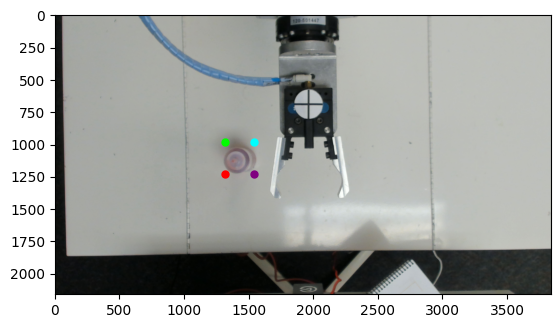

In [59]:
plt.imshow(img1)
        #sidway #up
plt.plot(1540,980,marker=".",color="cyan",markersize="10")

plt.plot(1315,1225,marker=".",color="red",markersize="10")

plt.plot(1315,980,marker=".",color="lime",markersize="10")

plt.plot(1540,1225,marker=".",color="purple",markersize="10")